##Decision Tree Classifier##

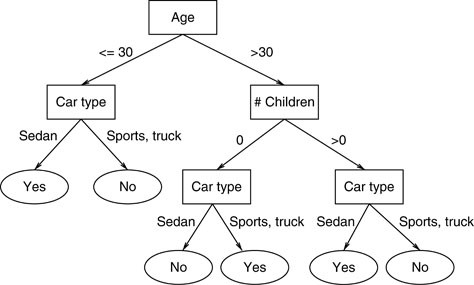

**Import Libraries**

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

**Data Loading**

In [40]:
iris = load_iris()
X = iris.data
y = iris.target

**Splitting Data**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

**Starting the Model**

In [44]:
clf = DecisionTreeClassifier(random_state=1)

In [47]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [48]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9555555555555556


In [50]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter to fine tune
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}
# Decision tree classifier
tree = DecisionTreeClassifier(random_state=1)
# GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,
                           cv=5, verbose=True)
grid_search.fit(X_train, y_train)

# Best score and estimator
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)


Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.9714285714285715
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=1)


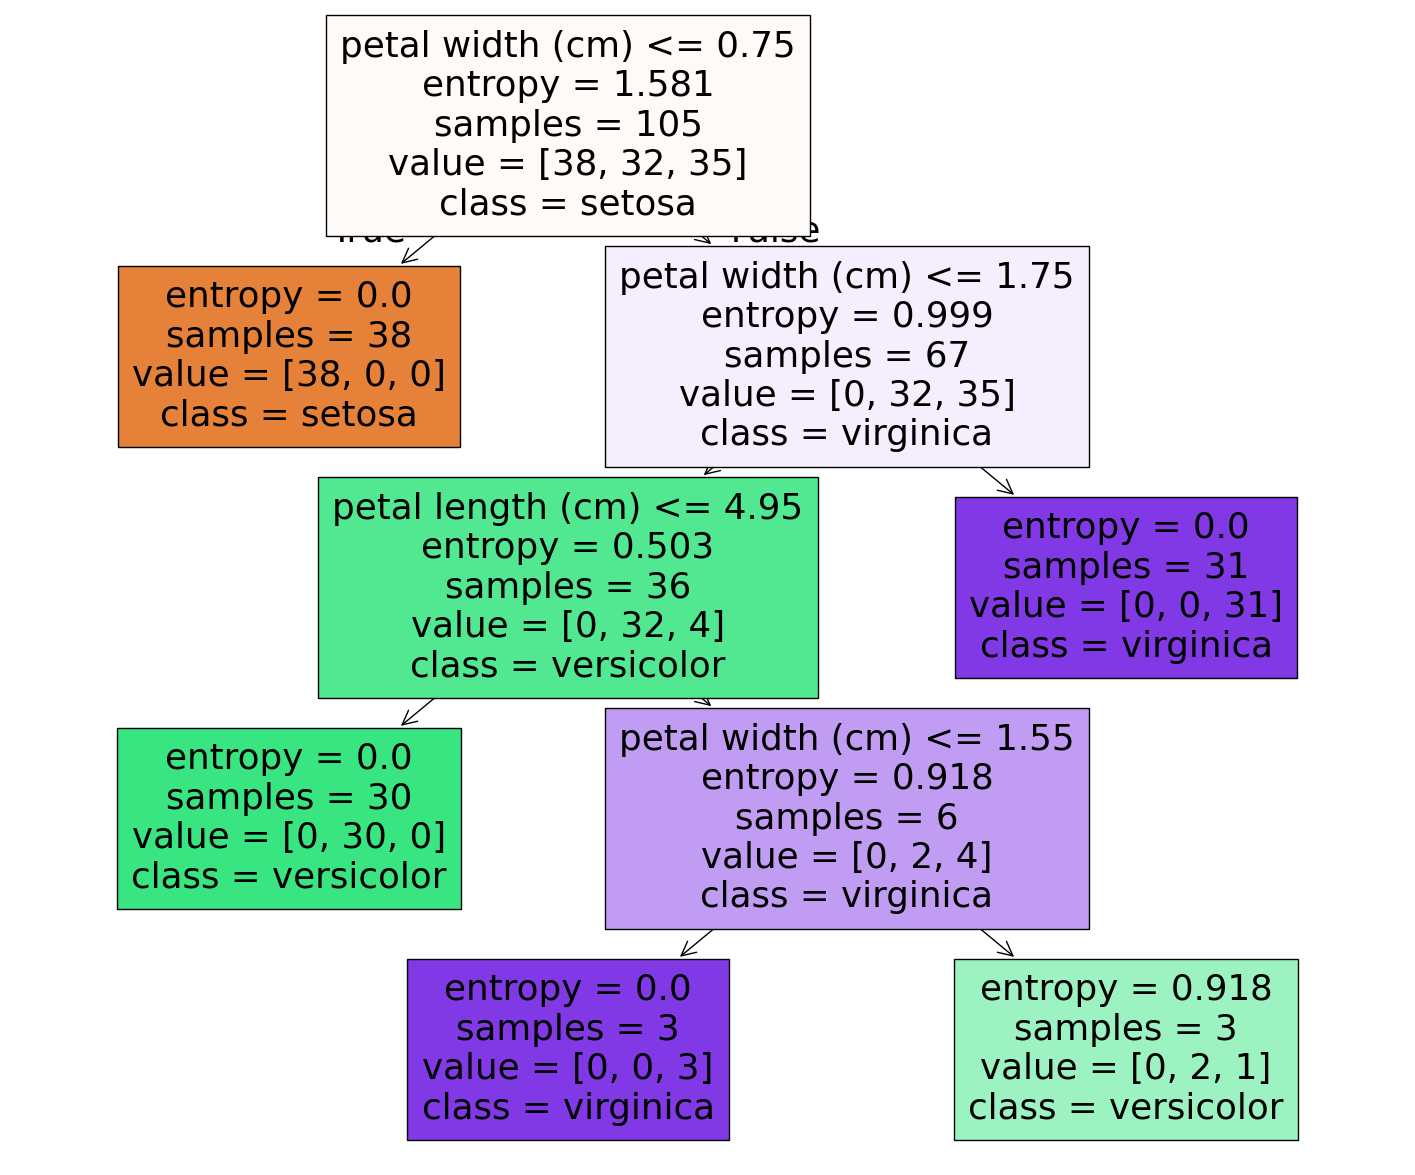

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# best estimator
tree_clf = grid_search.best_estimator_
# plot
plt.figure(figsize=(18, 15))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names,
          class_names=iris.target_names)
plt.show()
